In [2]:
import pandas as pd
df=pd.read_csv('data_titanic.csv')

In [2]:
df.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [4]:
df=df.set_index(('PassengerId'))

In [5]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df=df.drop('Cabin',axis=1)

In [12]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [15]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
df['Embarked'].fillna('C',inplace=True)

In [17]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [20]:
import matplotlib.pyplot as plt

In [23]:
df['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

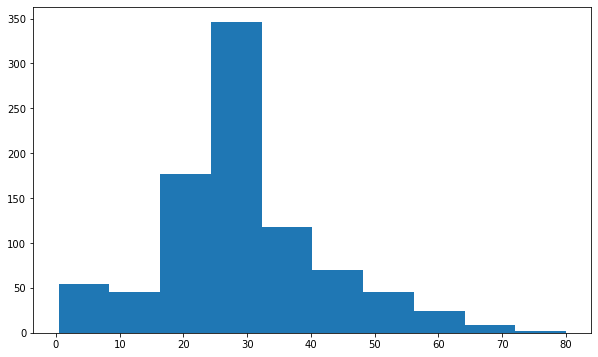

In [31]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'])

In [34]:
import seaborn as sns

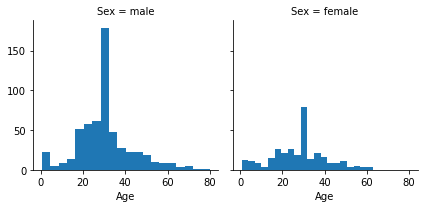

In [36]:
g1=sns.FacetGrid(df,col='Sex')
g1.map(plt.hist,'Age',bins=20)

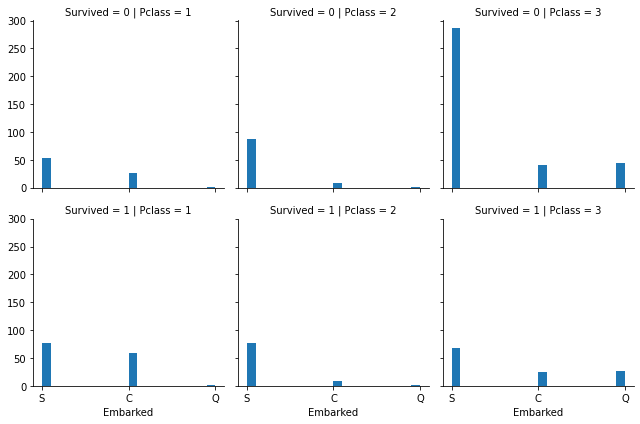

In [45]:
g2=sns.FacetGrid(df,col='Pclass',row='Survived')
g2.map(plt.hist,'Embarked',bins=20)

In [3]:
df[['Embarked','Survived']].groupby(['Embarked'],as_index=True).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [48]:
def plot_correlation_map( df ):
    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
            corr,
            cmap = cmap,
                    square=True,
                cbar_kws={ 'shrink' : .9 },
                    ax=ax,
                annot = True,
    annot_kws = { 'fontsize' : 12 })

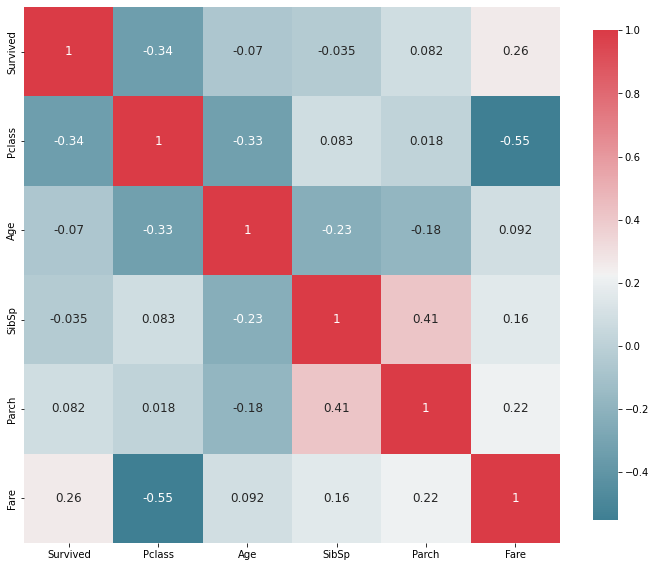

In [49]:
plot_correlation_map( df )

In [7]:
Title_Dictionary = {

"Capt": "Officer",
"Col": "Officer",
"Major": "Officer",
"Dr": "Officer",

"Rev": "Officer",
"Jonkheer": "Royalty",
"Don": "Royalty",
"Sir" : "Royalty",
"Lady" : "Royalty",
"the Countess": "Royalty",
"Dona": "Royalty",
"Mme": "Miss",
"Mlle": "Miss",
"Miss" : "Miss",
"Ms": "Mrs",
"Mr" : "Mrs",
"Mrs" : "Mrs",
"Master" : "Master"
}


In [10]:
df['Name'][0]

'Braund, Mr. Owen Harris'

In [12]:
df['title'] = df['Name'].str.split(',|\.',expand = True)[1] 
df['title'] = df['title'].str.strip()
title_mapping = {"Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                      "Dr":         "Officer",
                    "Rev":        "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                   "Lady" :      "Royalty",
                  "the Countess": "Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master" }
                            

In [13]:
df['Family size']=df['SibSp']+df['Parch']

In [19]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,Family size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,1
